In [104]:
import numpy as np 
import pandas as pd # data processing
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('./Kaggle/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./Kaggle/sample_submission.csv
./Kaggle/training.csv
./Kaggle/test.csv
./Kaggle/submission.csv
./Kaggle/train.csv


##Preprocessing and Extracting features

In [105]:
#import train data 
train_set = pd.read_csv('./Kaggle/train.csv')
train_set.head(8)

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...
5,306713195832307712,Politics,'Dr. Rajan: Fiscal consolidation will create m...
6,306100962337112064,Politics,"FACT: More than 800,000 defense employees will..."
7,305951758759366657,Sports,"'1st Test. Over 39: 0 runs, 1 wkt (M Wade 0, M..."


In [106]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6525 entries, 0 to 6524
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetId    6525 non-null   int64 
 1   Label      6525 non-null   object
 2   TweetText  6525 non-null   object
dtypes: int64(1), object(2)
memory usage: 153.1+ KB


3325


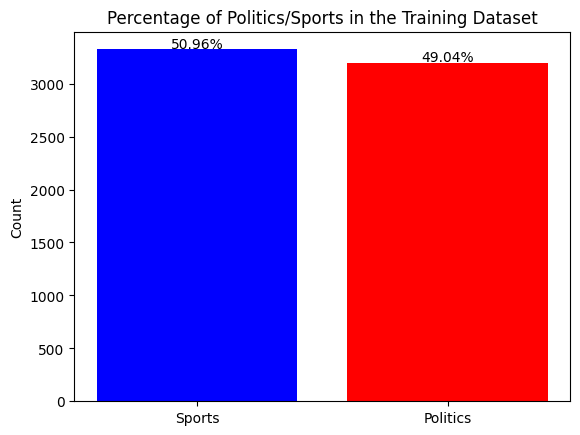

In [107]:
labels = ["Sports", "Politics"]
counts = [    train_set[train_set.Label == "Sports"].count()[0],
    train_set[train_set.Label == "Politics"].count()[0],
]
print( train_set[train_set.Label == "Sports"].count()[0])
fig, ax = plt.subplots()
ax.bar(labels, counts,color=['b','r'])
ax.set_title("Percentage of Politics/Sports in the Training Dataset")
ax.set_ylabel("Count")
for i, v in enumerate(counts):
    ax.text(i, v+10, str(round(v/sum(counts)*100,2)) + "%", ha="center")
plt.show()


In [108]:
import nltk
from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
#from nltk.stem import SnowballStemmer
import re
#import string   

##Preprocess data

In [109]:
#definition of Preprocessing function
def preprocessing(data):
    # Download stopwords if not already downloaded
    nltk.download('stopwords')
    nltk.download('punkt')
    data['cleanTweet'] = data['TweetText'].apply(lambda x: x.lower())
    data['cleanTweet'] = data['cleanTweet'].apply(lambda x: re.sub(r'@\w+\s?', '', x))
    #data['cleanTweet'] = data['cleanTweet'].apply(lambda x: re.sub(r'#\w+\s?', '', x))
    data['cleanTweet'] = data['cleanTweet'].apply(lambda x: re.sub(r'[^\w\s]','',x))
    #data['cleanTweet'] = data['cleanTweet'].apply(lambda x: re.sub(r'\d+', '', x))
    #data['cleanTweet'] = data['cleanTweet'].apply(lambda x: re.sub(r'(\w)\1{2,}','',x))
    #remove URLs
    data['cleanTweet'] = data['cleanTweet'].apply(lambda x: re.sub(r'http\S+', '', x))
    data['cleanTweet'] = data['cleanTweet'].apply(lambda x: re.sub(r'https\S+', '', x))
    ##data['cleanTweet'] = data['cleanTweet'].apply(lambda x: re.sub(r'\b\w\b', '', x))
    # Tokenize the text
    data['cleanTweet'] = data['cleanTweet'].apply(lambda x: word_tokenize(x))

    
    stopwords_english = stopwords.words('english') 
    
    tweets = []
    w_count = []
    for tweet in data['cleanTweet']: # Go through every word in your tokens list
        
        preprocessed_tweet = []
        # remove stop words and punctuation
        for word in  tweet :
            if (word not in stopwords_english ):  
                preprocessed_tweet.append(word)
        tweets.append(preprocessed_tweet)
        w_count.append(len(preprocessed_tweet))
    data['cleanTweet'] = tweets
    data['count_words'] =w_count

In [110]:
train_set = pd.read_csv('./Kaggle/train.csv')

In [111]:
preprocessing(train_set)
train_set

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,TweetId,Label,TweetText,cleanTweet,count_words
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...,"[seckerry, value, measured, dollars, terms, de...",8
1,304834304222064640,Politics,'@rraina1481 I fear so',[fear],1
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...,"[watch, video, highlights, wwc13, final, austr...",8
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...,"[rt, nitro, circus, albertpark, theymakeitlook...",6
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...,"[always, good, thing, thanks, feedback]",5
...,...,...,...,...,...
6520,296675082267410433,Politics,'Photo: PM has laid a wreath at Martyrs Monume...,"[photo, pm, laid, wreath, martyrs, monument, a...",9
6521,306677536195231746,Sports,'The secret of the Chennai pitch - crumbling o...,"[secret, chennai, pitch, crumbling, edges, sol...",10
6522,306451295307431937,Sports,@alinabhutto he isn't on Twitter either,"[isnt, twitter, either]",3
6523,306088574221176832,Sports,'Which England player would you take out to di...,"[england, player, would, take, dinner, featuri...",7


### drop values with count_words = 0

In [112]:
'''def drop_zeros_count_words(data):
  data = data[data['count_words'] > 0]
  data = data.reset_index(drop=True)

drop_zeros_count_words(train_set)

train_set'''

"def drop_zeros_count_words(data):\n  data = data[data['count_words'] > 0]\n  data = data.reset_index(drop=True)\n\ndrop_zeros_count_words(train_set)\n\ntrain_set"

In [113]:
def words_count(t_set) : 
    words_count = {}
    for i in range(len(t_set)):
        label = t_set['Label'][i]
        for word in t_set['cleanTweet'][i]:
                pair = ((word,label))
                if pair in words_count :
                    words_count[pair] += 1
                else :
                    words_count[pair] = 1
    return words_count

In [114]:
train_words_count=words_count(train_set)
train_set

,TweetId,Label,TweetText,cleanTweet,count_words
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...,"[seckerry, value, measured, dollars, terms, de...",8
1,304834304222064640,Politics,'@rraina1481 I fear so',[fear],1
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...,"[watch, video, highlights, wwc13, final, austr...",8
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...,"[rt, nitro, circus, albertpark, theymakeitlook...",6
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...,"[always, good, thing, thanks, feedback]",5
...,...,...,...,...,...
6520,296675082267410433,Politics,'Photo: PM has laid a wreath at Martyrs Monume...,"[photo, pm, laid, wreath, martyrs, monument, a...",9
6521,306677536195231746,Sports,'The secret of the Chennai pitch - crumbling o...,"[secret, chennai, pitch, crumbling, edges, sol...",10
6522,306451295307431937,Sports,@alinabhutto he isn't on Twitter either,"[isnt, twitter, either]",3
6523,306088574221176832,Sports,'Which England player would you take out to di...,"[england, player, would, take, dinner, featuri...",7


In [115]:
import operator
sorted_train_words_count = sorted(train_words_count.items(), key=operator.itemgetter(1), reverse=True)
sorted_train_words_count[:10]

[(('rt', 'Sports'), 523),
 (('amp', 'Politics'), 422),
 (('rt', 'Politics'), 368),
 (('indvaus', 'Sports'), 347),
 (('president', 'Politics'), 329),
 (('test', 'Sports'), 314),
 (('obama', 'Politics'), 236),
 (('1st', 'Sports'), 220),
 (('runs', 'Sports'), 196),
 (('bbl02', 'Sports'), 194)]

In [116]:
def vectorize_tweet(t_set,freqs) :
    politics_Words = [0 for i in range(t_set.shape[0])]
    sports_Words = [0 for i in range(t_set.shape[0])]
    for i in range(t_set.shape[0]) :
        for word in  t_set['cleanTweet'][i]:
            if (word,'Politics') in freqs :
                 politics_Words[i] += freqs.get((word,'Politics'))
            if (word,'Sports') in freqs :
                sports_Words[i] += freqs.get((word,'Sports'))
    t_set['politic_Words'] = politics_Words
    t_set['sport_Words'] = sports_Words 


In [117]:
vectorize_tweet(train_set,train_words_count)

In [118]:
train_set

,TweetId,Label,TweetText,cleanTweet,count_words,politic_Words,sport_Words
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...,"[seckerry, value, measured, dollars, terms, de...",8,109,2
1,304834304222064640,Politics,'@rraina1481 I fear so',[fear],1,6,1
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...,"[watch, video, highlights, wwc13, final, austr...",8,267,428
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...,"[rt, nitro, circus, albertpark, theymakeitlook...",6,368,565
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...,"[always, good, thing, thanks, feedback]",5,84,240
...,...,...,...,...,...,...,...
6520,296675082267410433,Politics,'Photo: PM has laid a wreath at Martyrs Monume...,"[photo, pm, laid, wreath, martyrs, monument, a...",9,316,7
6521,306677536195231746,Sports,'The secret of the Chennai pitch - crumbling o...,"[secret, chennai, pitch, crumbling, edges, sol...",10,92,150
6522,306451295307431937,Sports,@alinabhutto he isn't on Twitter either,"[isnt, twitter, either]",3,20,37
6523,306088574221176832,Sports,'Which England player would you take out to di...,"[england, player, would, take, dinner, featuri...",7,504,428


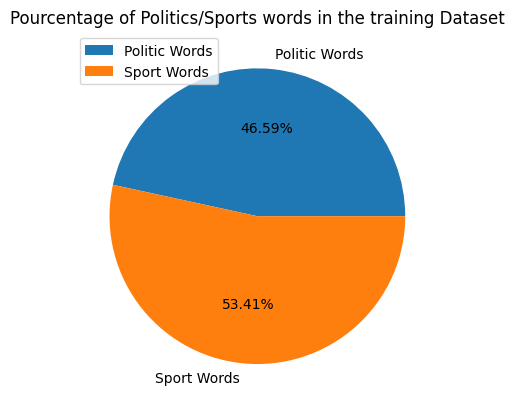

In [119]:
labels = ["Politic Words", "Sport Words"]

counts = [    sum(train_set['politic_Words']),
    sum(train_set['sport_Words']),
]


plt.pie(counts, labels=labels, autopct="%.2f%%")

plt.title("Pourcentage of Politics/Sports words in the training Dataset")
plt.legend(loc='upper left')
plt.show()

##Model Building and Training 

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV

In [121]:
# assume that you have already preprocessed your text data and stored it in a pandas dataframe named 'train_set'
# split the data into features (X) and labels (y)
X = train_set['cleanTweet'].apply(lambda x: ' '.join(x))
y = train_set['Label']

# create a TfidfVectorizer object and fit it to your training data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)
X=X.toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=44)

algos = [
    RandomForestClassifier(random_state=52),
    GaussianNB(),
    MultinomialNB(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    LogisticRegression()
]

for algo in algos:

  model = algo
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  # Evaluate the performance of the trained model on the testing data
  #y_pred = nb_classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(" {}  \t| Accuracy: {}".format(algo,accuracy))

 RandomForestClassifier(random_state=52)  	| Accuracy: 0.9296636085626911
 GaussianNB()  	| Accuracy: 0.944954128440367
 MultinomialNB()  	| Accuracy: 0.9694189602446484
 DecisionTreeClassifier()  	| Accuracy: 0.8929663608562691
 KNeighborsClassifier()  	| Accuracy: 0.6299694189602446
 LogisticRegression()  	| Accuracy: 0.9663608562691132


In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

#Test Model


In [123]:
test_set = pd.read_csv('./Kaggle/test.csv')
print(test_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetId    2610 non-null   int64 
 1   TweetText  2610 non-null   object
dtypes: int64(1), object(1)
memory usage: 40.9+ KB
None


In [124]:
preprocessing(test_set)
#drop_zeros_count_words(test_set)
test_words_count=words_count(train_set)
#vectorize_tweet(test_set,train_words_count)
#test_set

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


######Based on our analysis, we discovered that the MultinomialNB() algorithm provided us with a higher accuracy score than the other algorithms we tested. Therefore, it is recommended to use this algorithm for tweet classification.

In [125]:

#model = MultinomialNB()
#model.fit(X_train, y_train)

params = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
    'fit_prior': [True, False],
    'class_prior': [None, [0.1,]* 2, ]
}

# Create a GridSearchCV object and fit it to your training data
model = GridSearchCV(MultinomialNB(), params, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Best hyperparameters: ", model.best_params_)

# Evaluate the performance of the trained model on the testing data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
X = test_set['cleanTweet'].apply(lambda x: ' '.join(x))
print(X.head(10))
tests= vectorizer.transform(X)
y_pred = model.predict(tests)
print(y_pred)

Best hyperparameters:  {'alpha': 0.1, 'class_prior': None, 'fit_prior': False}
Accuracy: 0.963302752293578
0    28 home side threaten mason bennett gets end l...
1    thx asking see derives series abbreviations po...
2                  construction along shores black sea
3    seckerryu2019s remarks meeting foreign ministe...
4    iplauction begun ricky ponting first player go...
5       viswanathan anand draws fabiano caruana zurich
6    say tonights game send text 81892 start kop tw...
7    olympics may paralympics begin sure follow lat...
8                                big compliment thanks
9    espargarxf3 quickest jerez day two gets slow s...
Name: cleanTweet, dtype: object
['Sports' 'Politics' 'Politics' ... 'Sports' 'Politics' 'Sports']


In [126]:
submission = pd.DataFrame().assign(TweetId=test_set['TweetId'])
submission['Label'] = y_pred.tolist()
submission.to_csv('./Kaggle/submission.csv', index=False)